Fetch data from `PS2_Data.txt`.

In [4]:
data_file=open('PS2_Data.txt','r')
raw_data=data_file.readlines()
data_file.close()
datefreq={}
for line in raw_data:
    parts=line.split(' ')
    datefreq[parts[0]]=int(parts[1])
months=[]
for y in ('2013','2014','2015','2016','2017','2018','2019','2020','2021','2022'):
    for m in ('01','02','03','04','05','06','07','08','09','10','11','12'):months.append(y+'-'+m)
x=list(range(1,121))
corr={}
y=[0]*120
for i in range(120):corr[months[i]]=i
for key in datefreq.keys():y[corr[key[:7]]]+=datefreq[key]

Model training and prediction.
Details:
*   The model used here is a neural network model with two hidden layers (both of size 100) and ran for 100000 iterations. All other settings are default.
*   Data from Jan 1st 2013 to Dec 31st 2020 are used in the training process. Data from Jan 1st 2021 to Dec 31st 2022 are held out for testing. The prediction results are plotted until Dec 31st 2025.

**Nota Bene**: The model training process contains randomness, so results might not be replicable on the first trial. Replication of results might require repeated trials instead.

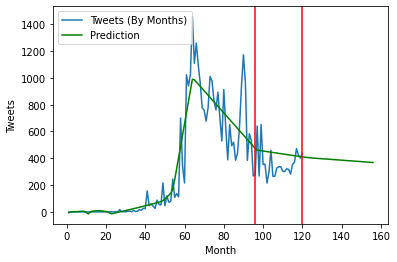

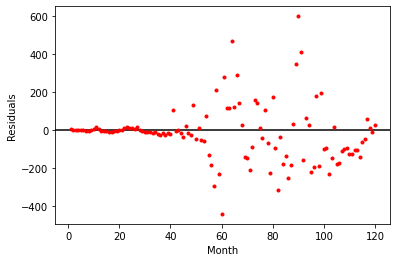

In [5]:
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
nn=MLPRegressor(hidden_layer_sizes=(100,100),max_iter=100000)
for i in range(len(x)):x[i]=[x[i]]
nn.fit(x[:-24],y[:-24])
predx=list(range(1,157))
predy=[]
for x_val in predx:predy.append(nn.predict([[x_val]]))
plt.plot(x,y,label='Tweets (By Months)')
plt.xlabel('Month')
plt.ylabel('Tweets')
plt.plot(predx,predy,color='green',label='Prediction')
plt.axvline(96,color='red')
plt.axvline(120,color='red')
plt.legend()
plt.show()
x=list(range(1,121))
resy=[]
for i in range(len(y)):resy.append(y[i]-predy[i])
for x_val in predx:predy.append(nn.predict([[x_val]]))
plt.axhline(0,color='black')
plt.xlabel('Month')
plt.ylabel('Residuals')
plt.plot(x,resy,color='red',marker='.',linestyle='None')
plt.show()